___
# Ciência dos Dados - PROJETO 1

## Pedro Henrique Greco Lopes

___

## Qual método de conexão é predominante nas áreas rural e urbana em cada região do país, para aqueles que ganham até a renda mensal média do brasileiro?

___
## Introdução

O Brasil, segundo um estudo feito por Samy Dana, economista e professora da FGV, é um dos países que tem uma das maiores médias de preços para contratar serviço de internet. Aqui a média do preço para uma conexão de 1Mbps por mês é 25,06 dólares. No Japão, por exemolo, essa mesma média é 0,27 dólares. A internet, uma das ferramentas mais poderosas da atualidade, está presente em todo o território nacional, mesmo com seu alto preço. Tendo isso em vista, para ver como a internet está distribuida pelo país , usando os dados da PNAD, este projeto pretende analisar que tipo de conexão à internet, Conexão Discada, 3G-4G ou Banda Larga, é predominante em cada região do Brasil, e também nas zonas urbana e rural. Tudo isso para aqueles que tem uma renda menor ou igual à renda per capita média do brasileiro, que em 2015 era 1.113 reais. Tudo isso será feito para três anos, 2013, 2014 e 2015, para ver se houve alguma mudança ou tansição nas características que serão pesquisadas.


___
## Análise e Resultados


### Nos próximos boxes acontecera a leitura de todos os dados das PNADs, em seguida a filtragem para a database ficar apenas com as variáveis desejadas e a organização dela. As variáveis serão as de tipo de conexão de internet, estados do país, zonas urbana e rural e renda (até 1113).

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [3]:
dados = pd.read_csv('DOM2015.csv',sep=',')
nad14 = pd.read_csv('DOM2014.csv',sep=',')
nad13 = pd.read_csv('DOM2013.csv',sep=',')

In [4]:
####PNAD2015

#3g ou 4g
dados.V02424 = dados.V02424.astype('category')
dados.V02424.cat.categories = ('Sim','Nao')

#Conex. Discada
dados.V02425 = dados.V02425.astype('category')
dados.V02425.cat.categories = ('Sim','Nao')

#Banda Larga
dados.V02426 = dados.V02426.astype('category')
dados.V02426.cat.categories = ('Sim','Nao')

#Regiao
dados.loc[(dados.V4105<4),'ZONA'] = 'Urbana'
dados.loc[(dados.V4105>3),'ZONA'] = 'Rural'
dados.ZONA = dados.ZONA.astype('category')


#Regiao2
dados.loc[(dados.UF==35) | (dados.UF==31) | (dados.UF==32) | (dados.UF==33),'Regiao'] = 'Sudeste'
dados.loc[(dados.UF==42) | (dados.UF==41) | (dados.UF==43),'Regiao'] = 'Sul'
dados.loc[(dados.UF==50) | (dados.UF==51) | (dados.UF==52) | (dados.UF==53),'Regiao'] = 'Cento-Oeste'
dados.loc[(dados.UF==11) | (dados.UF==12) | (dados.UF==13) | (dados.UF==14) | (dados.UF==15) | (dados.UF==16) | (dados.UF==17),'Regiao'] = 'Norte'
dados.loc[(dados.UF==29) | (dados.UF==28) | (dados.UF==27) | (dados.UF==26) | (dados.UF==25) | (dados.UF==24) | (dados.UF==21) | (dados.UF==22) | (dados.UF==23),'Regiao'] = 'Nordeste'
dados.Regiao = dados.Regiao.astype('category')

dados=dados.rename(columns={'V02424':'TresGQuatroG'})
dados=dados.rename(columns={'V02425':'ConexDiscada'})
dados=dados.rename(columns={'V02426':'BandaLarga'})
dados=dados.rename(columns={'V4621':'Renda'})
dados = dados[(dados.Renda!=999999999999)&(dados.Renda<=1113)]

dados=dados.loc[:,['Regiao','ZONA','TresGQuatroG','ConexDiscada','BandaLarga','Renda']]





In [5]:
####PNAD2014

#3g ou 4g
nad14.V02424 = nad14.V02424.astype('category')
nad14.V02424.cat.categories = ('Sim','Nao')

#Conex. Discada
nad14.V02425 = nad14.V02425.astype('category')
nad14.V02425.cat.categories = ('Sim','Nao')

#Banda Larga
nad14.V02426 = nad14.V02426.astype('category')
nad14.V02426.cat.categories = ('Sim','Nao')

#Regiao
nad14.loc[(nad14.V4105<4),'ZONA'] = 'Urbana'
nad14.loc[(nad14.V4105>3),'ZONA'] = 'Rural'
nad14.ZONA = nad14.ZONA.astype('category')

#Regiao2
nad14.loc[(nad14.UF==35) | (nad14.UF==31) | (nad14.UF==32) | (nad14.UF==33),'Regiao'] = 'Sudeste'
nad14.loc[(nad14.UF==42) | (nad14.UF==41) | (nad14.UF==43),'Regiao'] = 'Sul'
nad14.loc[(nad14.UF==50) | (nad14.UF==51) | (nad14.UF==52) | (nad14.UF==53),'Regiao'] = 'Cento-Oeste'
nad14.loc[(nad14.UF==11) | (nad14.UF==12) | (nad14.UF==13) | (nad14.UF==14) | (nad14.UF==15) | (nad14.UF==16) | (nad14.UF==17),'Regiao'] = 'Norte'
nad14.loc[(nad14.UF==29) | (nad14.UF==28) | (nad14.UF==27) | (nad14.UF==26) | (nad14.UF==25) | (nad14.UF==24) | (nad14.UF==21) | (nad14.UF==22) | (nad14.UF==23),'Regiao'] = 'Nordeste'
nad14.Regiao = nad14.Regiao.astype('category')

nad14=nad14.rename(columns={'V02424':'TresGQuatroG'})
nad14=nad14.rename(columns={'V02425':'ConexDiscada'})
nad14=nad14.rename(columns={'V02426':'BandaLarga'})
nad14=nad14.rename(columns={'V4621':'Renda'})
nad14 = nad14[(nad14.Renda!=999999999999)&(nad14.Renda<=1113)]

nad14=nad14.loc[:,['Regiao','ZONA','TresGQuatroG','ConexDiscada','BandaLarga','Renda']]




In [6]:
####PNAD2013

#3g ou 4g
nad13.V02424 = nad13.V02424.astype('category')
nad13.V02424.cat.categories = ('Sim','Nao')

#Conex. Discada
nad13.V02425 = nad13.V02425.astype('category')
nad13.V02425.cat.categories = ('Sim','Nao')

#Banda Larga
nad13.V02426 = nad13.V02426.astype('category')
nad13.V02426.cat.categories = ('Sim','Nao')

#Regiao
nad13.loc[(nad13.V4105<4),'ZONA'] = 'Urbana'
nad13.loc[(nad13.V4105>3),'ZONA'] = 'Rural'
nad13.ZONA = nad13.ZONA.astype('category')

#Regiao2
nad13.loc[(nad13.UF==35) | (nad13.UF==31) | (nad13.UF==32) | (nad13.UF==33),'Regiao'] = 'Sudeste'
nad13.loc[(nad13.UF==42) | (nad13.UF==41) | (nad13.UF==43),'Regiao'] = 'Sul'
nad13.loc[(nad13.UF==50) | (nad13.UF==51) | (nad13.UF==52) | (nad13.UF==53),'Regiao'] = 'Cento-Oeste'
nad13.loc[(nad13.UF==11) | (nad13.UF==12) | (nad13.UF==13) | (nad13.UF==14) | (nad13.UF==15) | (nad13.UF==16) | (nad13.UF==17),'Regiao'] = 'Norte'
nad13.loc[(nad13.UF==29) | (nad13.UF==28) | (nad13.UF==27) | (nad13.UF==26) | (nad13.UF==25) | (nad13.UF==24) | (nad13.UF==21) | (nad13.UF==22) | (nad13.UF==23),'Regiao'] = 'Nordeste'
nad13.Regiao = nad13.Regiao.astype('category')

nad13=nad13.rename(columns={'V02424':'TresGQuatroG'})
nad13=nad13.rename(columns={'V02425':'ConexDiscada'})
nad13=nad13.rename(columns={'V02426':'BandaLarga'})
nad13=nad13.rename(columns={'V4621':'Renda'})
nad13 = nad13[(nad13.Renda!=999999999999)&(nad13.Renda<=1113)]

nad13=nad13.loc[:,['Regiao','ZONA','TresGQuatroG','ConexDiscada','BandaLarga','Renda']]




###     Para começar os gráficos abaixo mostrarão uma visão mais geral do cenário do tipo de conexão no país. Haverá um conjuto de três gráficos para cada tipo de conexão, um para cada ano. Eles vão mostrar a frequencia relativa daqueles que fazem uso ou não do tipo de conexão entre todos aqueles que tem acesso à internet

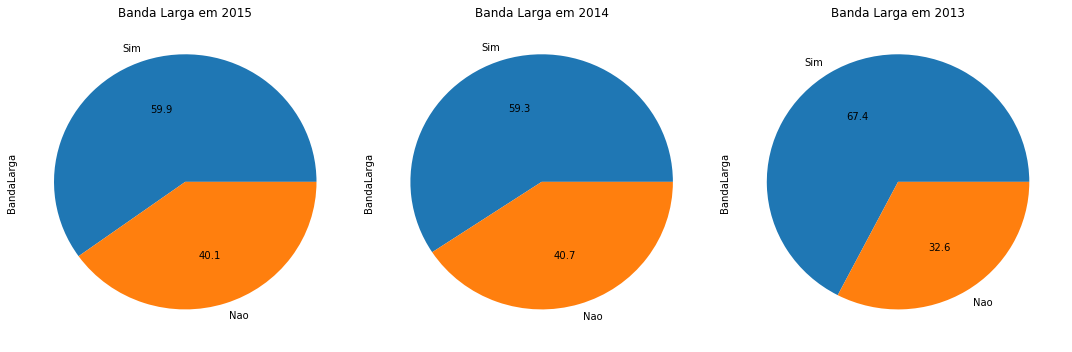

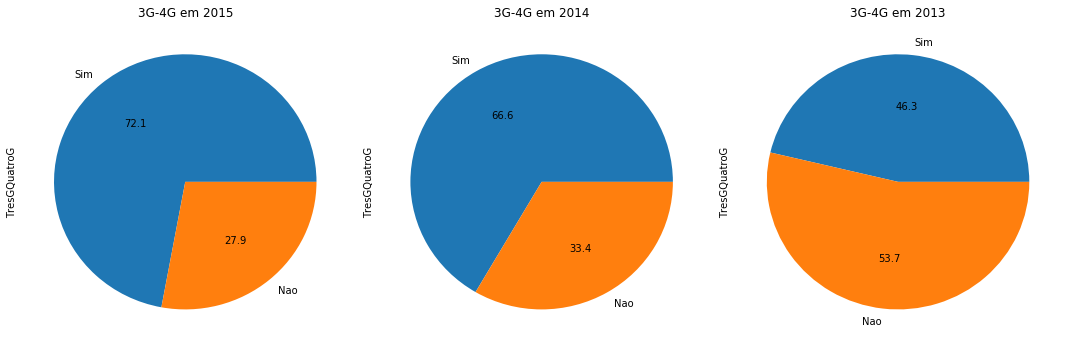

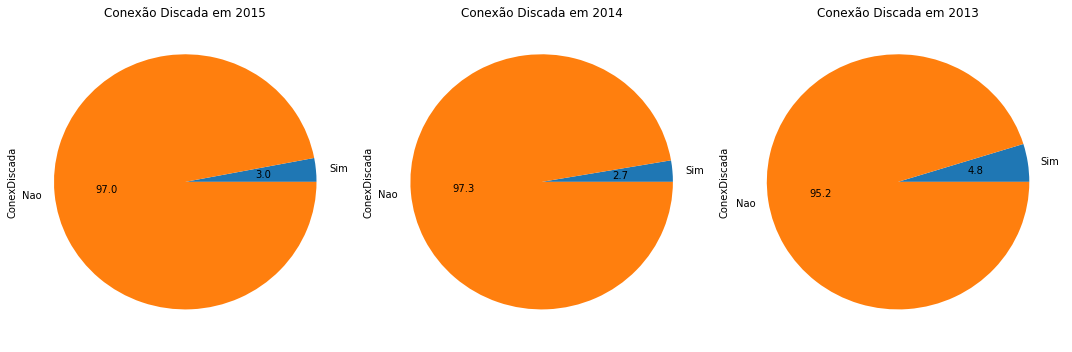

In [7]:
####Gráficos 

##Banda Larga
ut1 = (dados.BandaLarga.value_counts(sort=False,normalize=True)*100).round(decimals=1)
ut2 = (nad14.BandaLarga.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut3 = (nad13.BandaLarga.value_counts(sort=False, normalize=True)*100).round(decimals=1)

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut1.plot(kind='pie',title='Banda Larga em 2015',autopct='%.1f')
plt.subplot(132)
plot = ut2.plot(kind='pie',title='Banda Larga em 2014',autopct='%.1f')
plt.subplot(133)
plot = ut3.plot(kind='pie',title='Banda Larga em 2013',autopct='%.1f')

plt.tight_layout()
plt.show()

##3G-4G
ut4 = dados.TresGQuatroG.value_counts(sort=False)
ut5 = (nad14.TresGQuatroG.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut6 = (nad13.TresGQuatroG.value_counts(sort=False, normalize=True)*100).round(decimals=1)

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut4.plot(kind='pie',title='3G-4G em 2015',autopct='%.1f')
plt.subplot(132)
plot = ut5.plot(kind='pie',title='3G-4G em 2014',autopct='%.1f')
plt.subplot(133)
plot = ut6.plot(kind='pie',title='3G-4G em 2013',autopct='%.1f')

plt.tight_layout()
plt.show()

##Conex Discada
ut7 = (dados.ConexDiscada.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut8 = (nad14.ConexDiscada.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut9 = (nad13.ConexDiscada.value_counts(sort=False, normalize=True)*100).round(decimals=1)

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut7.plot(kind='pie',title='Conexão Discada em 2015',autopct='%.1f')
plt.subplot(132)
plot = ut8.plot(kind='pie',title='Conexão Discada em 2014',autopct='%.1f')
plt.subplot(133)
plot = ut9.plot(kind='pie',title='Conexão Discada em 2013',autopct='%.1f')

plt.tight_layout()
plt.show()


### Analisando estes gráficos podemos tirar algumas conclusões mais gerais. 
### A primeira delas é que o método de conexão discada é quase insignificante no cenário brasileiro atual. 
### Outra característica que podemos perceber é um crescimento oposto se compararmos 3G-4G a Banda larga. Enquanto a porcentagem de pessoas que usa banda larga diminuiu de 2013 para 2014 e quase se manteve em 2015,  a de 3G-4G teve aumentos significantes a cada ano.
### Além disso, pode-se dizer com certeza que há pessoas que usam tanto 3G-4G como Banda Larga. Por exemplo, em 2015, 72% usavm 3G-4G e 59.9% usavam Banda Larga, o que implica que algumas pessoas usavam os dois tipos.

### Mas agora será feita uma análise mais detalhada, para saber mais sobre a distribuição por estado e por zona de cada tipo de conexão de internet. Poderemos examinar se todos os estados se comportam igual aos dados gerais que foram apresentados acima.
### Os próximos gráficos mostrarão dados da Conexão Discada, a frequência relativa (em porcentagem) daqueles que usam e não usam conexão discada, em cada zona (rural ou urbana) de cada região do país.

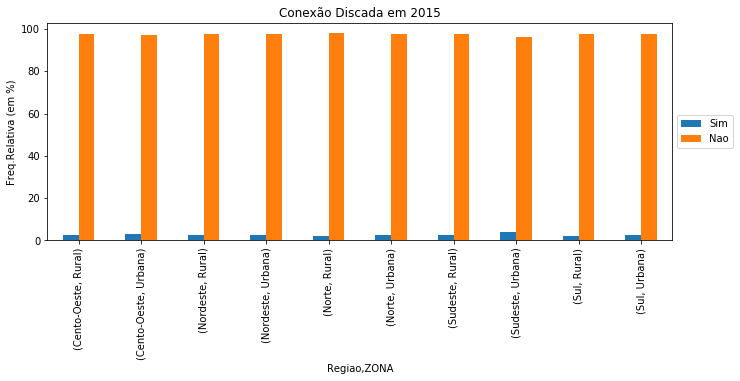

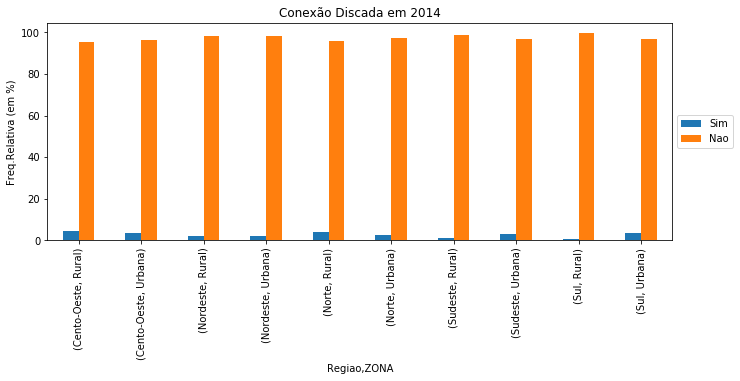

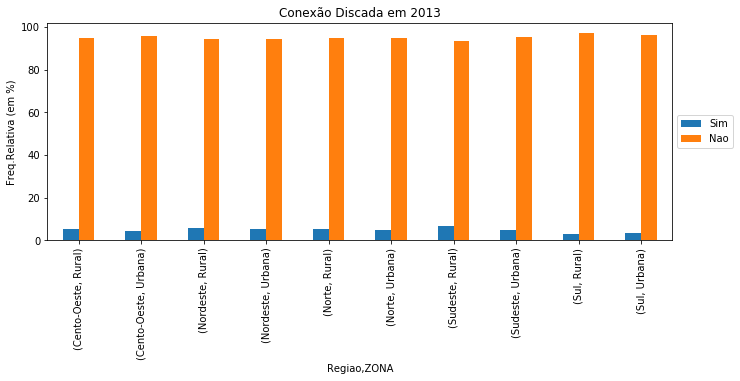

In [20]:
#CONEX dis 2015
ct10=(pd.crosstab([dados.Regiao, dados.ZONA],dados.ConexDiscada, normalize='index')*100).round(decimals=1)
ct10
plot = ct10.plot(kind='bar',title='Conexão Discada em 2015',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()



#conex disc 2014
ct14=(pd.crosstab([nad14.Regiao, nad14.ZONA],nad14.ConexDiscada, normalize='index')*100).round(decimals=1)
ct14
plot = ct14.plot(kind='bar',title='Conexão Discada em 2014',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()



#conex disc 2013
ct15=(pd.crosstab([nad13.Regiao, nad13.ZONA],nad13.ConexDiscada, normalize='index')*100).round(decimals=1)
ct15
plot = ct15.plot(kind='bar',title='Conexão Discada em 2013',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()


### Estes gráficos apenas reforçam aquilo que apareceu nos dads gerais, de que é uma parcela extremamente pequena que ainda faz uso desse método de conexão.

### Os próximos três gráficos serão iguais aos de cima, porém com os dados de 3G-4G.

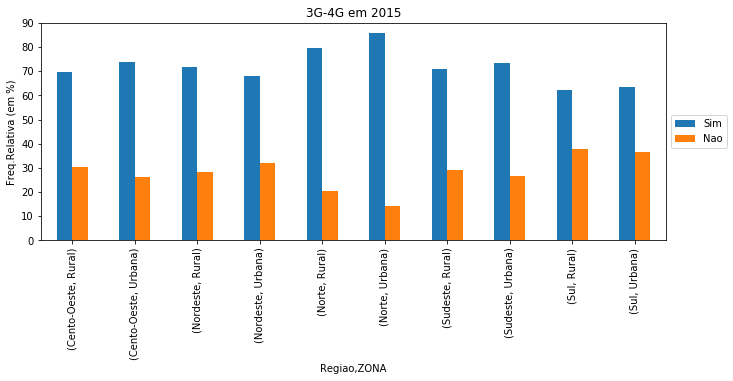

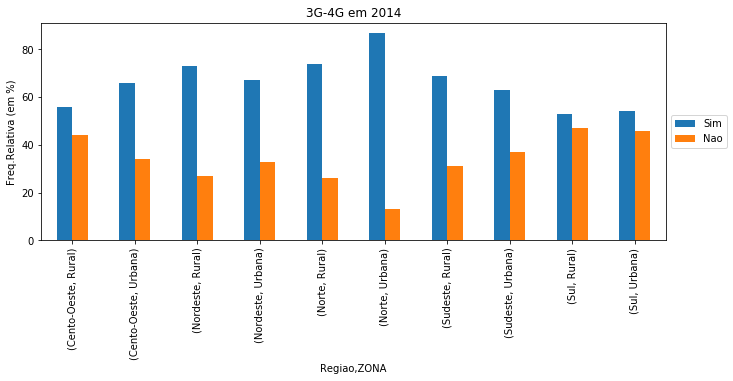

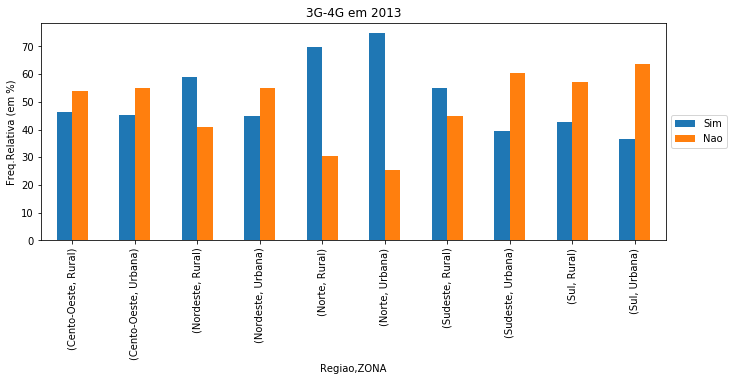

In [374]:
#Grafico 3g-4g 2015
ct9=(pd.crosstab([dados.Regiao, dados.ZONA],dados.TresGQuatroG, normalize='index')*100).round(decimals=1)
ct9
plot = ct9.plot(kind='bar',title='3G-4G em 2015',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

#Grafico 3g-4g 2014
ct13=(pd.crosstab([nad14.Regiao, nad14.ZONA],nad14.TresGQuatroG, normalize='index')*100).round(decimals=1)
ct13
plot = ct13.plot(kind='bar',title='3G-4G em 2014',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()


#Grafico 3g-4g 2013
ct16=(pd.crosstab([nad13.Regiao, nad13.ZONA],nad13.TresGQuatroG, normalize='index')*100).round(decimals=1)
ct16
plot = ct16.plot(kind='bar',title='3G-4G em 2013',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()


### Nestes gráficos pode-se notar que em 2013 apenas uma região do Brasil, em ambas zonas, tinha mais gente que usava 3G-4G do que gente que não, que era o Norte. E as outras duas localidades que também tinham essa característica eram a zona rural do Sudeste e a rural do Nordeste. Ou seja, de 4 zonas que tinham mais pessoas com acesso do que sem, 3 eram rurais e apenas 1 urbana.

### Além disso, se nota que em 2015 o Norte ainda era o que tinha a maior frequência relativa de pessoas que usavam 3G-4G e que sua zona rural tinha uma frequência relativa maior que todas as outras zonas rurais e urbanas do país. Interessante notar que o Nordeste, tanto na zona rural como na urbana, tinha frequências relativas próximas àquelas do Centro-Oeste e do Sudeste

### Os próximos três gráficos serão iguais aos de cima, porém com os dados de Banda Larga.

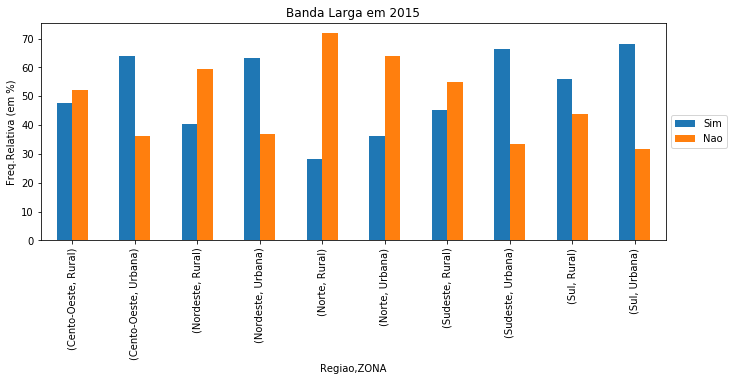

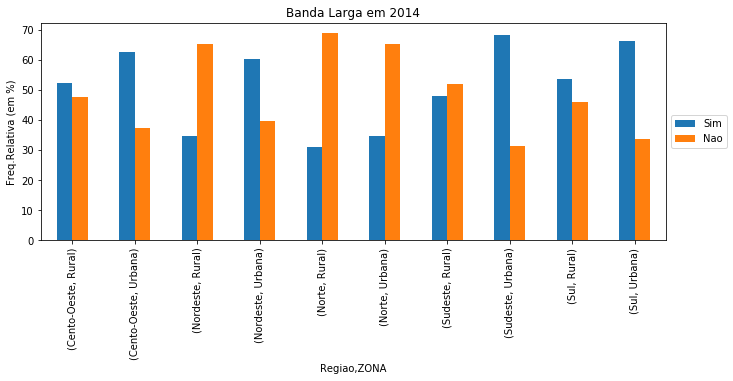

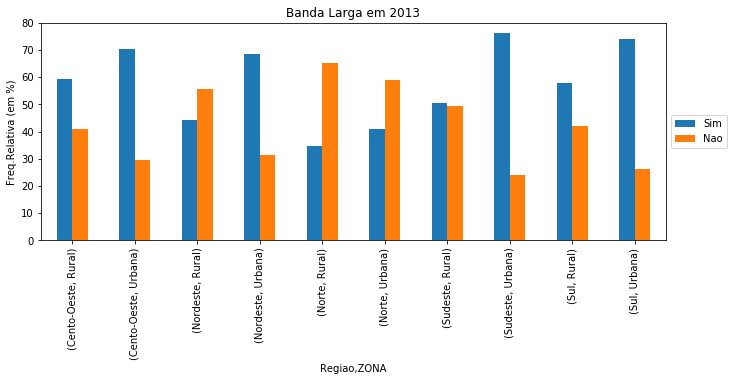

In [375]:
#Grafico BandLarg 2015
ct11=(pd.crosstab([dados.Regiao, dados.ZONA],dados.BandaLarga, normalize='index')*100).round(decimals=1)
ct11
plot = ct11.plot(kind='bar',title='Banda Larga em 2015',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()


#Grafico BandLarg 2014
ct12=(pd.crosstab([nad14.Regiao, nad14.ZONA],nad14.BandaLarga, normalize='index')*100).round(decimals=1)
ct12
plot = ct12.plot(kind='bar',title='Banda Larga em 2014',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()


#Grafico BandLarg 2013
ct17=(pd.crosstab([nad13.Regiao, nad13.ZONA],nad13.BandaLarga, normalize='index')*100).round(decimals=1)
ct17
plot = ct17.plot(kind='bar',title='Banda Larga em 2013',figsize=(14,4))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()



### Analisando os gráficos podemos notar uma reducão do uso da Banda Larga no passar dos anos, em 2013 a maior frequência estava perto de 80% e em 2015 a maior está abaixo de 70%, mas em 2015 ainda havia regiões onde prevalecia o uso sobre o não uso.  A região sul é um exemplo disso, onde isso acontece em ambas zonas.

### Interessante notar também que, com exceção do Sul, como visto acima, e do Norte que tem em ambas zonas uma frequência maior daqueles que não fazem uso da Banda Larga, em 2015 as outras regiões tem na zona urbana o uso prevalecendo sobre o não uso e na zona rural o contrário, o não uso maior que o uso.

___
# Conclusão 

## Ao observar os dados percebe-se que a frequência relativa de conexão por meio de 3G-4G é bem uniforme. Dentro de cada região, as frequências das área urbanas e rurais eram bem parecidas. O Centro-Oeste, o Nordeste e o Sudeste ficaram com frequencias relativas em torno de 70%, o Norte com as maiores, de 80% rural e 85% urbana, e a região sul com frequências em torno de 60%. Diferente do que ocorre com os dados da Banda Larga, nos quais as zonas de cada região tinham uma discrepancia consideravel, de 10% a 20% de diferença entre a área rural e urbana.

## Pode-se concluir que a conexão por meio de 3G-4G é predominante em quase todo o território nacional, tanto nas zonas urbanas como nas rurais, entre aqueles que ganham até 1.113 reais. Com exceção da zona urbana do Sul, onde a Banda Larga é o método de conexão mais usado entre aqueles que tem acesso à internet.